In [13]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mp
# import gaia_tools as gt
import scipy
from scipy.ndimage import gaussian_filter
import astropy.units as u
from astropy.coordinates import SkyCoord
import math
import h5py
# import healpy as hp
import pykdgrav3_utils
from pykdgrav3_utils import units
un = units.units(1, 600., verbose=True)
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
from matplotlib.projections.geo import GeoAxes

sys.path.append('/home/dnurme/linux_env/Thesis/My_thesis/Modules/')
from mock_wake import generate_mock_wake
from rotation_funcs import rotate, angle_finder, rz, ry, rx
from misc import plot_OD_gaussian

dMsolUnit = 1.000000e+00
dKpcUnit = 6.000000e+02
dGasConst =  1150890.1952769116
dErgPerGmUnit =  71.68174956254887
dGmPerCcUnit =  3.1333829769061664e-40
dSecUnit =  2.1867420491060357e+23
dKmPerSecUnit =  8.466507518602276e-05
dComovingGmPerCcUnit =  3.1333829769061664e-40


In [14]:
file = '/home/dnurme/linux_env/Data/pos_stars_Plummer_LMC.npy'
data = np.load(file)
x_plum = data[:,0]
y_plum = data[:,1]
z_plum = data[:,2]

star_coord = np.array([x_plum, y_plum, z_plum]).T

In [15]:
orbitfile = '/home/dnurme/linux_env/Data/trajlmc.txt'
orbit_full = pd.read_csv(orbitfile, delimiter = ' ')
orbit = orbit_full.loc[np.where(orbit_full['time'] < 0.01)]
d_orbit = np.sqrt(orbit['x']**2 + orbit['y']**2 + orbit['z']**2)
loc70 = np.isclose(d_orbit, 70.0, 0.01)
# 70 - d_orbit[loc70]
v70 = orbit['Vx'][loc70].values[0], orbit['Vy'][loc70].values[0], orbit['Vz'][loc70].values[0]
LMC_70 = np.array([orbit['x'][loc70].values[0], orbit['y'][loc70].values[0], orbit['z'][loc70].values[0]])

LMC_today = np.isclose(orbit['time'], 0.0, 0.001)
LMC_loc_today = np.array([orbit['x'][LMC_today].values[0], orbit['y'][LMC_today].values[0], orbit['z'][LMC_today].values[0]])


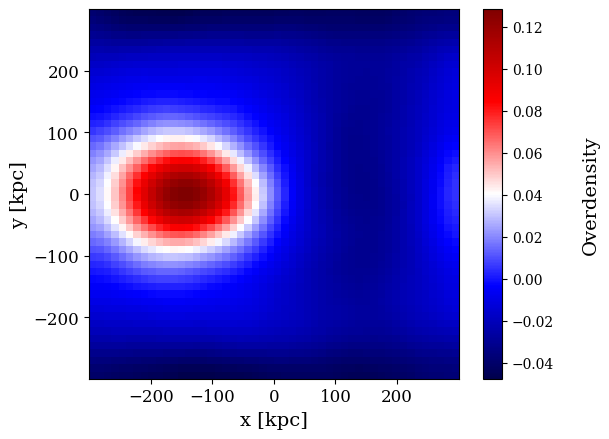

In [16]:
x = star_coord[:,0]
y = star_coord[:,1]

plot_OD_gaussian(x, y, (50, 50), 2,'x [kpc]', 'y [kpc]')
